In [987]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [988]:
df = pd.read_csv("../../Datasets/home-data-for-ml-course/train.csv", index_col=['Id'])

In [989]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [990]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Missing Value Treatment

In [991]:
null_count = {}
for each in df.columns:
    null_count_each = df[each].isnull().sum()
    if null_count_each != 0:
        null_count[each] = [null_count_each, round((null_count_each/len(df.index))*100,2)]

In [992]:
null_count_df = pd.DataFrame(null_count, index=['Nulls', '% Nulls'])
null_count_df = null_count_df.T.sort_values(by='Nulls', ascending=False)

In [993]:
null_count_df

,Nulls,% Nulls
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
MasVnrType,872.0,59.73
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageType,81.0,5.55
GarageYrBlt,81.0,5.55
GarageFinish,81.0,5.55


### PoolQC and MiscFeature

PoolQC (quality of pool) is 99.52% Null. --> We are dropping this.

MiscFeature is 96.3% missing --> We are dropping this.

In [994]:
df.drop(columns=['PoolQC', 'MiscFeature'], inplace=True)

## Alley 

There are 50 houses with Gravel and 41 with pave.

Let fill the nans with "No Alley"

In [995]:
df['Alley'].value_counts(dropna=False)

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

In [996]:
df.loc[:, 'Alley'] = df.loc[:,'Alley'].fillna("No Alley")

In [997]:
df['Alley'].value_counts()

Alley
No Alley    1369
Grvl          50
Pave          41
Name: count, dtype: int64

## Fence Quality

Let impute the nans with "No Fence"

In [998]:
df['Fence'].value_counts(dropna=False)

Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [999]:
df.loc[:,'Fence'] = df.loc[:,'Fence'].fillna("No Fence")

In [1000]:
df['Fence'].value_counts()

Fence
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: count, dtype: int64

## MasVnrType

MasVnrType: Masonry veneer type

there also is a related column

MasVnrArea: Masonry veneer area in square feet

In [1001]:
df['MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [1002]:
df['MasVnrArea'].isnull().sum()
# this has just 8 missing values

8

In [1003]:
# Look the value count for MasVnrArea col for MasVnrType is NaN
df[df['MasVnrType'].isna()]['MasVnrArea'].value_counts()

MasVnrArea
0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: count, dtype: int64

Looks like for most of the nans in "MasVnrType" the area is 0 or 1. We will replace the MasVnrType col with "No Vnr".

In [1004]:
## replacing Vnr Type with MasVnrArea 0, with No Vnr
df.loc[df['MasVnrArea'] == 0.0, 'MasVnrType'] = df.loc[df['MasVnrArea'] == 0.0, 'MasVnrType'].fillna('No Vnr')

In [1005]:
## replacing Vnr Type with MasVnrArea 1, with No Vnr
df.loc[df['MasVnrArea'] == 1.0, 'MasVnrType'] = df.loc[df['MasVnrArea'] == 1.0, 'MasVnrType'].fillna('No Vnr')

In [1006]:
df[['MasVnrType']].value_counts(dropna=False)

MasVnrType
No Vnr        861
BrkFace       445
Stone         128
BrkCmn         15
NaN            11
Name: count, dtype: int64

**We still have 11 NaNs to deal with. Lets look at MasVnrArea col for more insight**

### MasVnrArea

In [1007]:
df[df['MasVnrArea'].isna()]['MasVnrType']

Id
235     NaN
530     NaN
651     NaN
937     NaN
974     NaN
978     NaN
1244    NaN
1279    NaN
Name: MasVnrType, dtype: object

For all MasVnrArea NaNs, MasVnrType is also NaN suggesting that No Vnr.   

Lets impute MasVnrArea with 0 and MasVnrType with No Vnr

In [1008]:
df.loc[df['MasVnrArea'].isna(), 'MasVnrType'] = df.loc[df['MasVnrArea'].isna(), 'MasVnrType'].fillna('No Vnr')

df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [1009]:
df['MasVnrArea'].isna().sum()

0

In [1010]:
df['MasVnrType'].value_counts(dropna=False)

MasVnrType
No Vnr     869
BrkFace    445
Stone      128
BrkCmn      15
NaN          3
Name: count, dtype: int64

We still have 3 NaNs to deal with.

In [1011]:
df[df['MasVnrType'].isna()]['MasVnrArea']

Id
625     288.0
1301    344.0
1335    312.0
Name: MasVnrArea, dtype: float64

In [1012]:
df[(df['MasVnrArea'] > 250) & (df['MasVnrArea'] < 350)]['MasVnrType'].value_counts()

MasVnrType
BrkFace    76
Stone      24
BrkCmn      2
Name: count, dtype: int64

In [1013]:
df['MasVnrType'] = df['MasVnrType'].fillna('BrkFace')

In [1014]:
df['MasVnrType'].value_counts()

MasVnrType
No Vnr     869
BrkFace    448
Stone      128
BrkCmn      15
Name: count, dtype: int64

## FireplaceQu

Looks like this column alos has a related column

Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality

In [1015]:
df['FireplaceQu'].value_counts(dropna=False)

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

In [1016]:
df.loc[df['FireplaceQu'].isna(), ['Fireplaces']].value_counts(dropna=False)

Fireplaces
0             690
Name: count, dtype: int64

In [1017]:
df['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

We can confirm that, all the nans in FireplaceQu column is from the houses with no fire places. Lets fix that.

In [1018]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No')

In [1019]:
df['FireplaceQu'].value_counts(dropna=False)

FireplaceQu
No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

## LotFrontage 

LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet

**Need to further look into this. Might have to use regression to impute these values later**


In [1057]:
df['LotFrontage'].value_counts(dropna=False)

LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: count, Length: 111, dtype: int64

In [1058]:
df[df['LotArea'].isna()]['LotArea']

Series([], Name: LotArea, dtype: int64)

For now, let us impute this with the median and see how the prediction looks like.

In [1059]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median)

In [1060]:
df['LotFrontage'].isna().sum()

0

## Garage

GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality   
GarageCond: Garage condition  

In [1061]:
df.loc[df['GarageType'].isna(), 'GarageYrBlt'].value_counts(dropna=False)

GarageYrBlt
NaN    81
Name: count, dtype: int64

In [1062]:
df.loc[df['GarageType'].isna(), 'GarageFinish'].value_counts(dropna=False)

GarageFinish
NaN    81
Name: count, dtype: int64

In [1063]:
df.loc[df['GarageType'].isna(), 'GarageQual'].value_counts(dropna=False)

GarageQual
NaN    81
Name: count, dtype: int64

In [1064]:
df.loc[df['GarageType'].isna(), 'GarageCond'].value_counts(dropna=False)

GarageCond
NaN    81
Name: count, dtype: int64

We can see that, the data missing is because the house doesnot have a garage.

In [1065]:
df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NO')

In [1066]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('0000')

## Basement

BsmtQual: Height of the basement    
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  


missing:

BsmtFinType2	38.0	2.60  
BsmtExposure	38.0	2.60  
BsmtFinType1	37.0	2.53  
BsmtCond	37.0	2.53  
BsmtQual	37.0	2.53  


If we look into other numerical conditions for the missing values, these numerical columns have 0 in them. suggesting that the basement is missing. Therefore we are filling these with 0.

`df[df['BsmtCond'].isna()]['TotalBsmtSF']`

In [1067]:
# the decription says, if present. therefore the missing mean not present
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No')

In [1068]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')

In [1069]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')

In [1070]:
df['BsmtCond'] = df['BsmtCond'].fillna('No')

In [1071]:
df['BsmtQual'] = df['BsmtQual'].fillna('No') 

## Electrical

In [1072]:
df['Electrical'].value_counts(dropna=False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

In [1073]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [1074]:
df['Electrical'].value_counts(dropna=False)

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

## Final Check

In [1075]:
null_count = {}
for each in df.columns:
    null_count_each = df[each].isnull().sum()
    if null_count_each != 0:
        null_count[each] = [null_count_each, round((null_count_each/len(df.index))*100,2)]

In [1076]:
null_count

{}

No more missing values. Let us move forward and look into the correlation matrix.

In [1081]:
df.to_csv("./cleaned_housing_data")

In [1103]:
df = pd.read_csv('./cleaned_housing_data', index_col='Id')

# EDA

In [1104]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Correlation Matrix

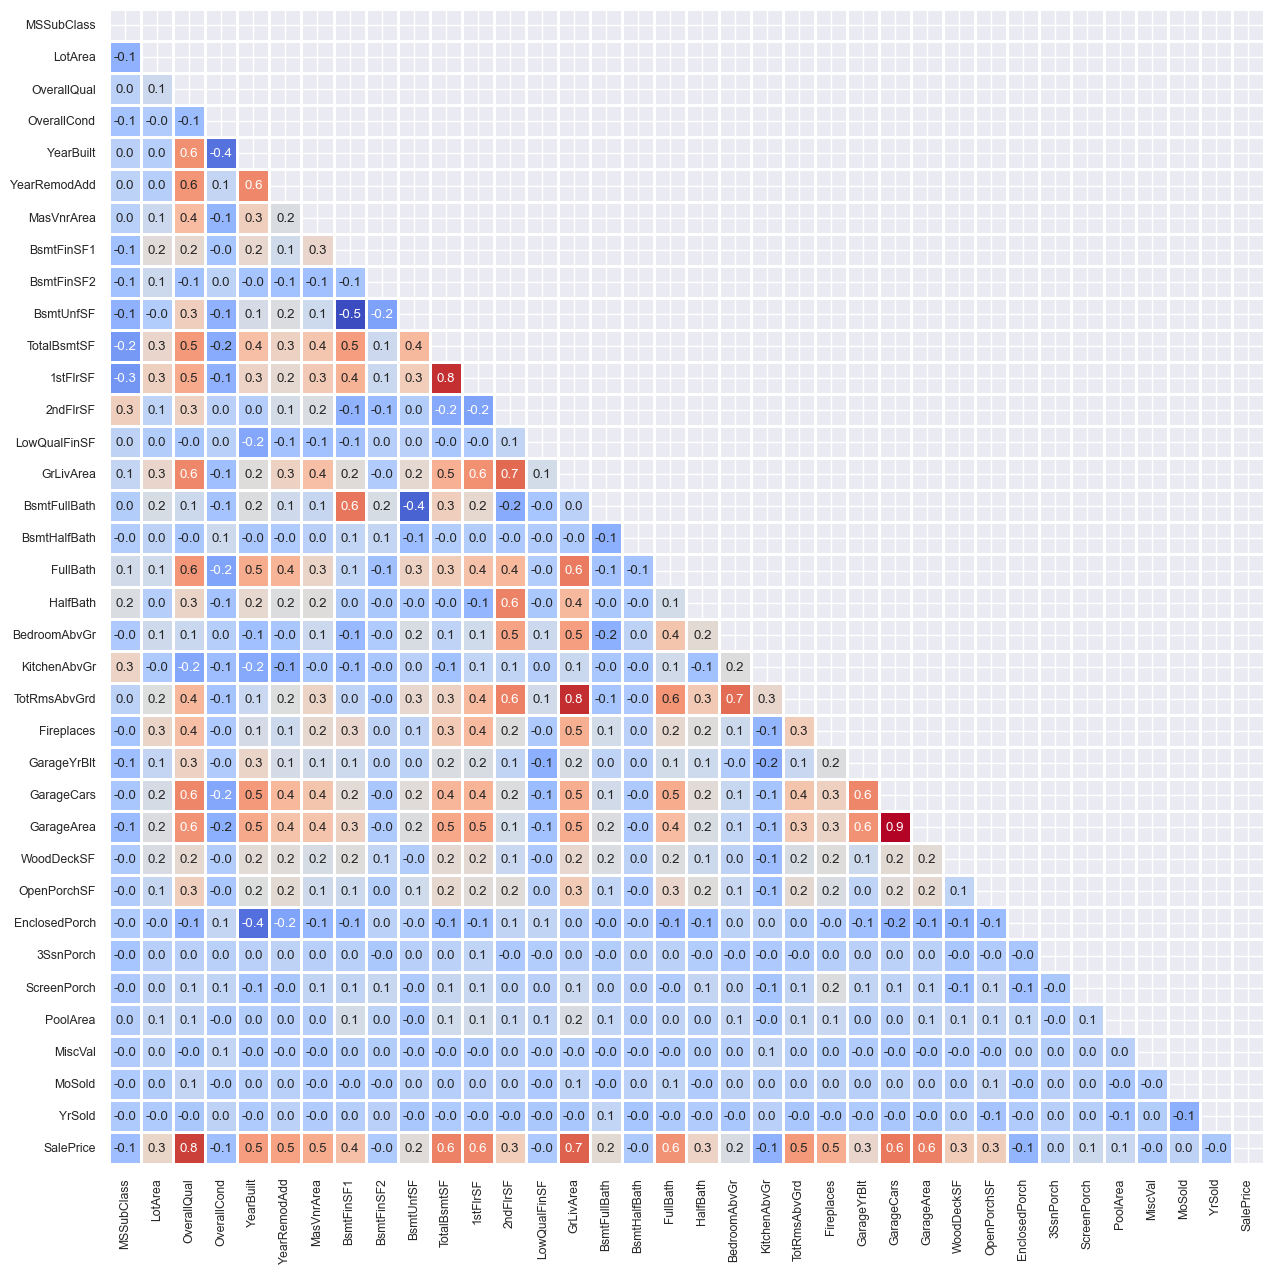

In [1105]:
sns.set(font_scale=0.8)
correlation_df = df.select_dtypes(np.number).corr()
mask = np.triu(correlation_df.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_df,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            mask=mask,
            square=True,
            linewidths=1,
            cbar=False)

plt.show()

In [1106]:
## Dropping the zero or close to zero correlations 

In [1107]:
correlation_df['SalePrice']

MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.261366
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

# Feature Engineering

### 1. Merging multiple bathroom columns into 1.
Assign 0.5 weight to half bath

In [1108]:
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (df['BsmtHalfBath'] * 0.5)

In [1109]:
df.drop(columns=['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], inplace=True)

### 2. Merging multiple basementh columns

In [1110]:
# let us look at their individual correlation with the target
df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']].corrwith(df['SalePrice'])

BsmtFinSF1     0.386420
BsmtFinSF2    -0.011378
BsmtUnfSF      0.214479
TotalBsmtSF    0.613581
dtype: float64

In [1111]:
df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].corrwith(df['TotalBsmtSF'])

BsmtFinSF1    0.522396
BsmtFinSF2    0.104810
BsmtUnfSF     0.415360
dtype: float64

High correlation among these variable.  

We will now drop these variables and train our model. Later, we will keep them and see if there is any change in performance of the model

In [1112]:
# TotalBsmtSF is the sum of individual columns
df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace=True)

### 3. Add few new features from exitsting ones

In [1113]:
# total age of the house when it was sold
df['HouseAge'] = np.abs(df['YearBuilt'] - df['YrSold'])

In [1114]:
df['NewHouse'] = df['HouseAge'].apply(lambda x: 1 if x < 10 else 0)

In [1115]:
df['OldHouse'] = df['HouseAge'].apply(lambda x: 1 if x > 50 else 0)

In [1116]:
df['RemodeledAge'] = np.abs(df['YearBuilt'] - df['YearRemodAdd'])

In [1117]:
df['TotalSquareFootage'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

In [1118]:
df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

In [1119]:
df['TotalOutdoorSpace'] = df['TotalPorchArea'] + df['WoodDeckSF'] + df['PoolArea']

In [1120]:
df['PricePerSF'] = df['SalePrice']/df['TotalSquareFootage']

In [1121]:
df['CarsToGarageRatio'] = df['GarageCars']/df['GarageArea']

In [1122]:
df['QualityScore'] = df['OverallCond'] * df['OverallQual']

#### 3.1 Checking Correlation of newly added features with target variable

In [1123]:
df[['HouseAge', 'RemodeledAge', 'TotalSquareFootage', 'TotalPorchArea', 'PricePerSF', 'TotalOutdoorSpace', 'CarsToGarageRatio', 'QualityScore']].corrwith(df['SalePrice'])

HouseAge             -0.523350
RemodeledAge         -0.217503
TotalSquareFootage    0.782260
TotalPorchArea        0.195739
PricePerSF            0.640602
TotalOutdoorSpace     0.390365
CarsToGarageRatio    -0.034869
QualityScore          0.565294
dtype: float64

We can drop the CarsToGarageRatio as it has very low correlation with the target variable

In [1124]:
df.drop(columns=['CarsToGarageRatio'], inplace=True)

### 4. Adding binary flag columns

In [1125]:
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [1126]:
df['HasPorch'] = df['TotalPorchArea'].apply(lambda x: 1 if x > 0 else 0)

In [1127]:
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

In [1128]:
df['HasFirePlace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [1130]:
df[['TotalBathrooms',
       'HouseAge', 'RemodeledAge', 'TotalSquareFootage', 'TotalPorchArea',
       'PricePerSF', 'TotalOutdoorSpace', 'QualityScore', 'HasPool',
       'HasPorch', 'HasGarage', 'HasFirePlace',]].corrwith(df['SalePrice'])

TotalBathrooms        0.631731
HouseAge             -0.523350
RemodeledAge         -0.217503
TotalSquareFootage    0.782260
TotalPorchArea        0.195739
PricePerSF            0.640602
TotalOutdoorSpace     0.390365
QualityScore          0.565294
HasPool               0.093708
HasPorch              0.296678
HasGarage             0.236832
HasFirePlace          0.471908
dtype: float64

In [1131]:
df.drop(columns=['HasPool'], inplace=True)

### 5. Converting `MoSold` Column to Categorical Season

In [1132]:
df[['MoSold']].corrwith(df['SalePrice'])

MoSold    0.046432
dtype: float64

In [1133]:
def get_season_(month_number):
    if month_number in [1,2,12]:
        return "winter"
    elif month_number in [3,4,5]:
        return 'spring'
    elif month_number in [6,7,8]:
        return 'autumn'
    elif month_number in [9,10,11]:
        return 'summer'

In [1134]:
df['SeasonOfSale'] = df['MoSold'].apply(lambda x: get_season_(x)) 

In [1135]:
df.drop(columns=['MoSold'], inplace=True)

#### I think we are done with feature engineering the numerical columns

## Feature Engineering Categorical Columns

In [1136]:
df.select_dtypes(np.object_).columns

Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'SeasonOfSale'],
      dtype='object')

### 1. Converting Neighborhood to NeightborhoodMeidanPrices Numerical Column

In [966]:
df['Neighborhood']

Id
1       CollgCr
2       Veenker
3       CollgCr
4       Crawfor
5       NoRidge
         ...   
1456    Gilbert
1457     NWAmes
1458    Crawfor
1459      NAmes
1460    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [967]:
# getting median house prices in the neighbourhood
neighborhood_median_prices = df.groupby(by="Neighborhood")['SalePrice'].median().sort_values(ascending=False).to_dict()

In [968]:
df['NeighborhoodMedianPrices'] = df['Neighborhood'].map(neighborhood_median_prices)

In [969]:
df[['NeighborhoodMedianPrices']].corrwith(df['SalePrice'])

NeighborhoodMedianPrices    0.733515
dtype: float64

Highly Correlated to Sale Price target

### 2. Proximity To Road

In [1138]:
df['CloseProximityToRoad'] = df[['Condition1', 'Condition2']].apply(lambda x : x['Condition1'] in ['Artery', 'Feedr'] or x['Condition2'] in ['Artery', 'Feedr'], axis=1)

In [1139]:
df['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [1140]:
df[['CloseProximityToRoad']].corrwith(df['SalePrice'])

CloseProximityToRoad   -0.166585
dtype: float64

### 3. Converting ordinal Categories to numerical column


#### 3.1 LotShape

In [973]:
df['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [974]:
lot_shape_mapping = {
    'Reg':3,
    'IR1':2,
    'IR2':1,
    'IR1':0
}

In [975]:
df['LotShapeScore'] = df['LotShape'].map(lot_shape_mapping)

#### 3.2 LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [976]:
land_contor_map = {
    'Lvl': 3,
    'Bnk': 2,
    'HLS': 1,
    'Low': 0
}

In [977]:
df['LandContourScore'] = df['LandContour'].map(land_contor_map)

#### 3.3 LandSlope

Gtl	Gentle slope  
Mod	Moderate Slope	  
Sev	Severe Slope  


In [1141]:
land_slope_map = {
    'Gtl':2,
    'Mod':1,
    'Sev':0 
}

In [1142]:
df['LandSlopeScore'] = df['LandSlope'].map(land_slope_map)

#### 3.4 ExterQual and ExterCond

ExterQual: Evaluates the quality of the material on the exterior 
ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [1143]:
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

df['ExternalQualityScore'] = df['ExterQual'].map(quality_mapping)
df['ExternalCondScore'] = df['ExterCond'].map(quality_mapping)


#### 3.5 BsmtQual and BsmtCond

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement


In [1144]:
df['BsmtQaulityScore'] = df['BsmtQual'].map(quality_mapping)
df['BsmtConditionScore'] = df['BsmtCond'].map(quality_mapping)

#### 3.6 Rating of basement finished area

BsmtFinType1 and BsmtFinType2
  
BsmtFinType1: Rating of basement finished area

     

In [1145]:
basement_mapping = {
    'GLQ': 7,
    'ALQ': 6,
    'BLQ': 5,
    'Rec': 4,
    'LwQ': 3,
    'Unf': 2,
    'NA': 1
}

df['BsmtFinType1'] = df['BsmtFinType1'].map(basement_mapping) 
df['BsmtFinType2'] = df['BsmtFinType2'].map(basement_mapping)

#### 3.7 Remaining Columns 

In [983]:
hkfgg_quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['HeatingQC'] = df['HeatingQC'].map(hkfgg_quality_map)
df['KitchenQual'] = df['KitchenQual'].map(hkfgg_quality_map)
df['FireplaceQu'] = df['FireplaceQu'].map(hkfgg_quality_map)
df['GarageCond'] = df['GarageCond'].map(hkfgg_quality_map)
df['GarageQual'] = df['GarageQual'].map(hkfgg_quality_map)


#### 3.8 Dropping Old Categorical Columns

In [1147]:
df.drop(columns=['Neighborhood', 'Condition1', 'Condition2', 'LotShape', 'LandContour', 'LandSlope','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond'], inplace=True)

In [1149]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'Utilities', 'LotConfig', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'TotalBathrooms', 'HouseAge', 'NewHouse',
       'OldHouse', 'RemodeledAge', 'Total

# Droppping few columns 

In [1196]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotConfig',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'SalePrice',
       'TotalBathrooms', 'HouseAge', 'NewHouse', 'OldHouse', 'RemodeledAge',
       'TotalSquareFootage', 'TotalPorchArea', 'TotalOutdoorSpace',
       'PricePerSF', 'QualityScore', 'HasPorch', 'HasGarage', 'HasFirePlace',
       'SeasonOfSale', 'CloseProxim

In [1197]:
to_drop = [
    'Street', 'Alley', 'Utilities', 'GarageYrBlt','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'
] 

In [1198]:
df.drop(columns=to_drop, inplace=True)

KeyError: "['Street', 'Alley', 'Utilities', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'] not found in axis"

# Outlier Detection

## Numerical Columns

In [1201]:
df.select_dtypes(np.number).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'SalePrice', 'TotalBathrooms', 'HouseAge',
       'NewHouse', 'OldHouse', 'RemodeledAge', 'TotalSquareFootage',
       'TotalPorchArea', 'TotalOutdoorSpace', 'PricePerSF', 'QualityScore',
       'HasPorch', 'HasGarage', 'HasFirePlace', 'LandSlopeScore',
       'ExternalQualityScore', 'ExternalCondScore', 'BsmtQaulityScore',
       'BsmtConditionScore'],
      dtype='object')

In [1202]:
n_cols = df.select_dtypes(np.number).columns

In [1206]:
useful_numerical_cols = (df[n_cols].corr()['SalePrice'] > -0.10).index

In [1209]:
def get_scatter(cols, target='SalePrice'):
    fig, axes = plt.subplots(13, 3, figsize=(20,50))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        sns.scatterplot(df, x=col, y= target, ax=ax)
    plt.tight_layout()

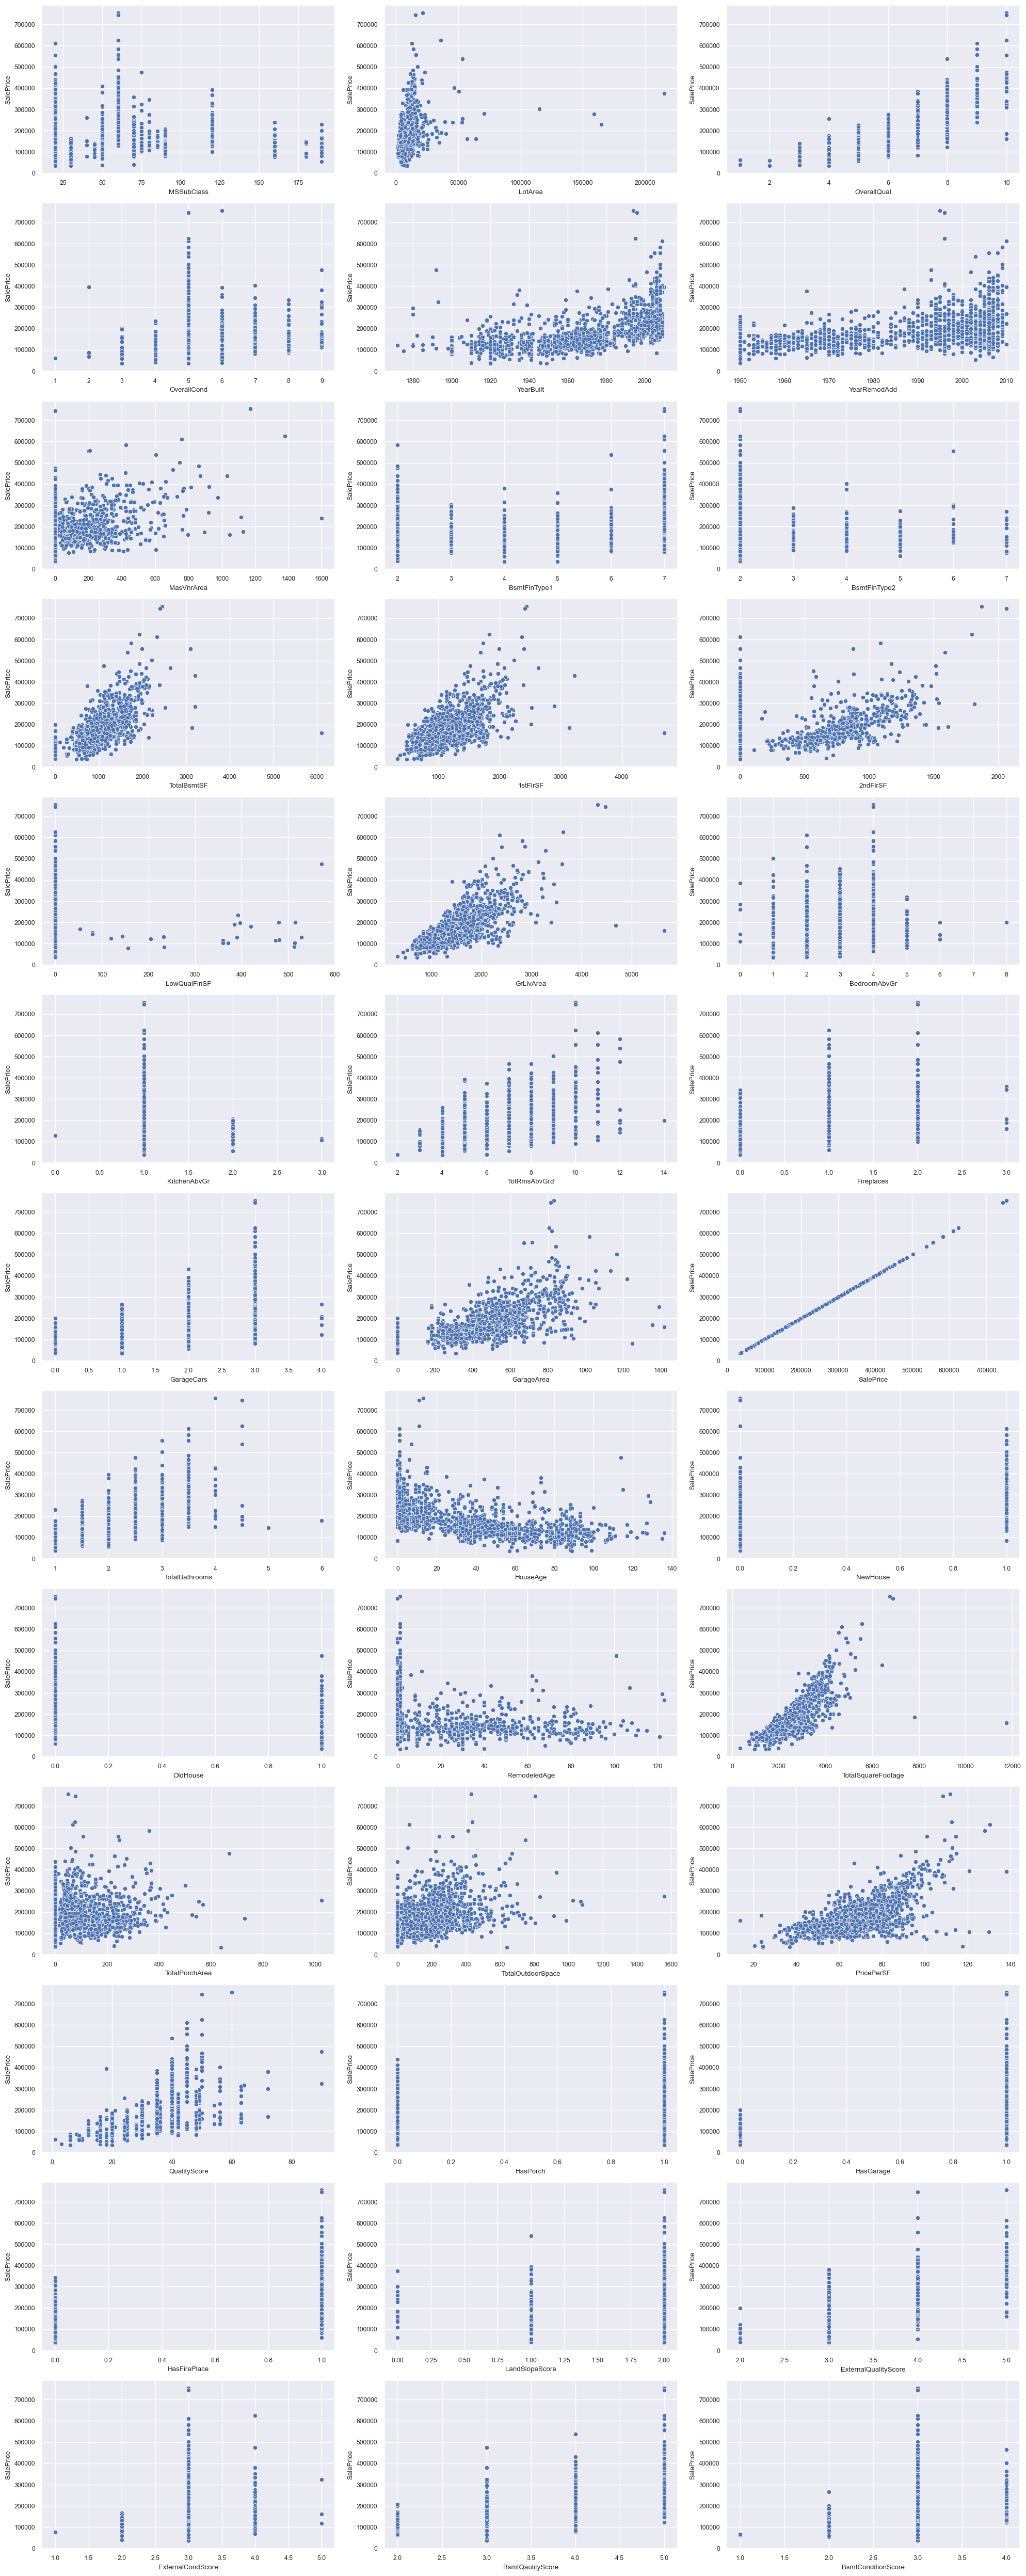

In [1210]:
get_scatter(useful_numerical_cols)

In [1178]:
def detect_outlier_iqr(df, columns):
    outliers = {}
    for each in columns:
        Q1 = df[each].quantile(0.25)
        Q3 = df[each].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[each] = df[(df[each] < lower_bound) | (df[each] > upper_bound)][[each, 'SalePrice']]
    return outliers


In [1179]:
numerical_columns = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                     'MiscVal', 'MasVnrArea', 'TotalPorchArea', 'TotalOutdoorSpace', 'PoolArea']


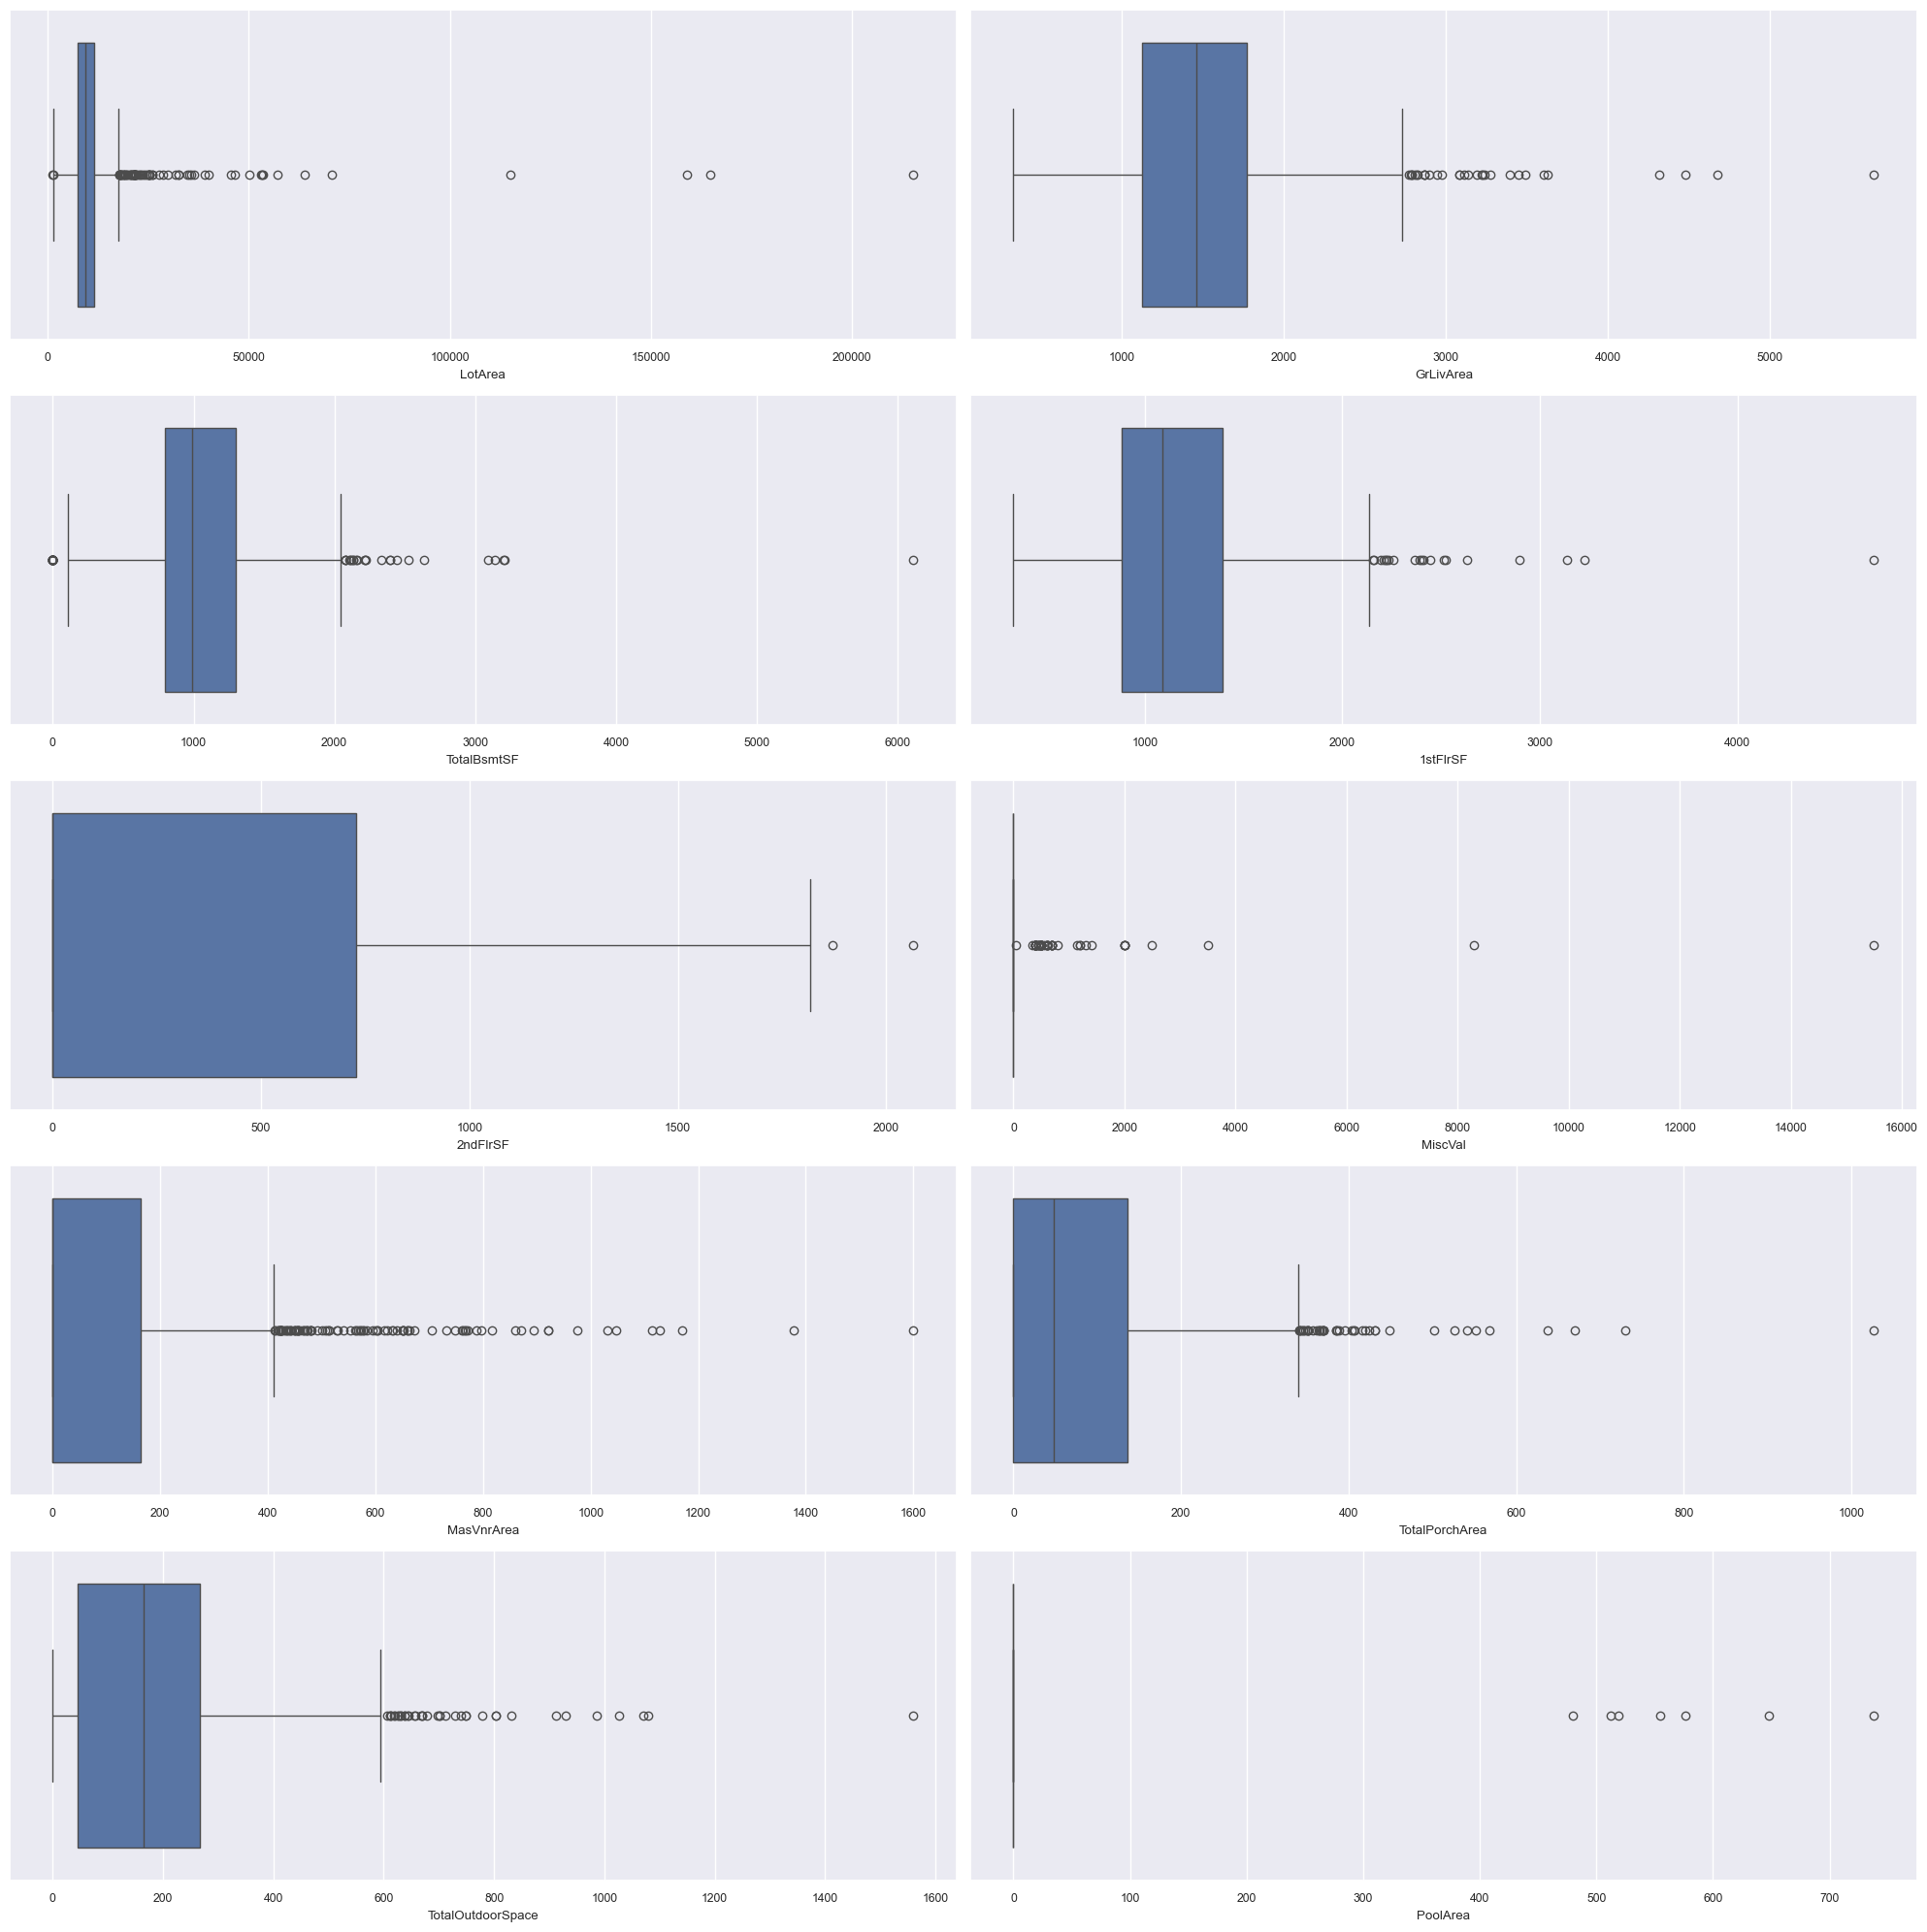

In [1188]:
fig, axes = plt.subplots(5,2, figsize=(20,20))
for axx, col in zip(axes.flatten(), numerical_columns):
    sns.boxplot(df, x=col, ax=axx)

plt.tight_layout()

## Let us look for outliers

<Axes: xlabel='SalePrice'>

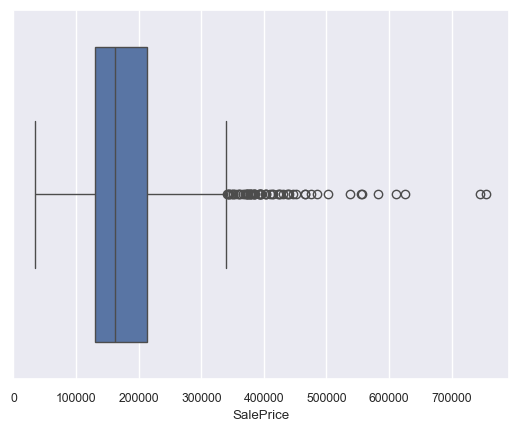

In [490]:
sns.boxplot(df, x=df['SalePrice'])

lots of outliers

35

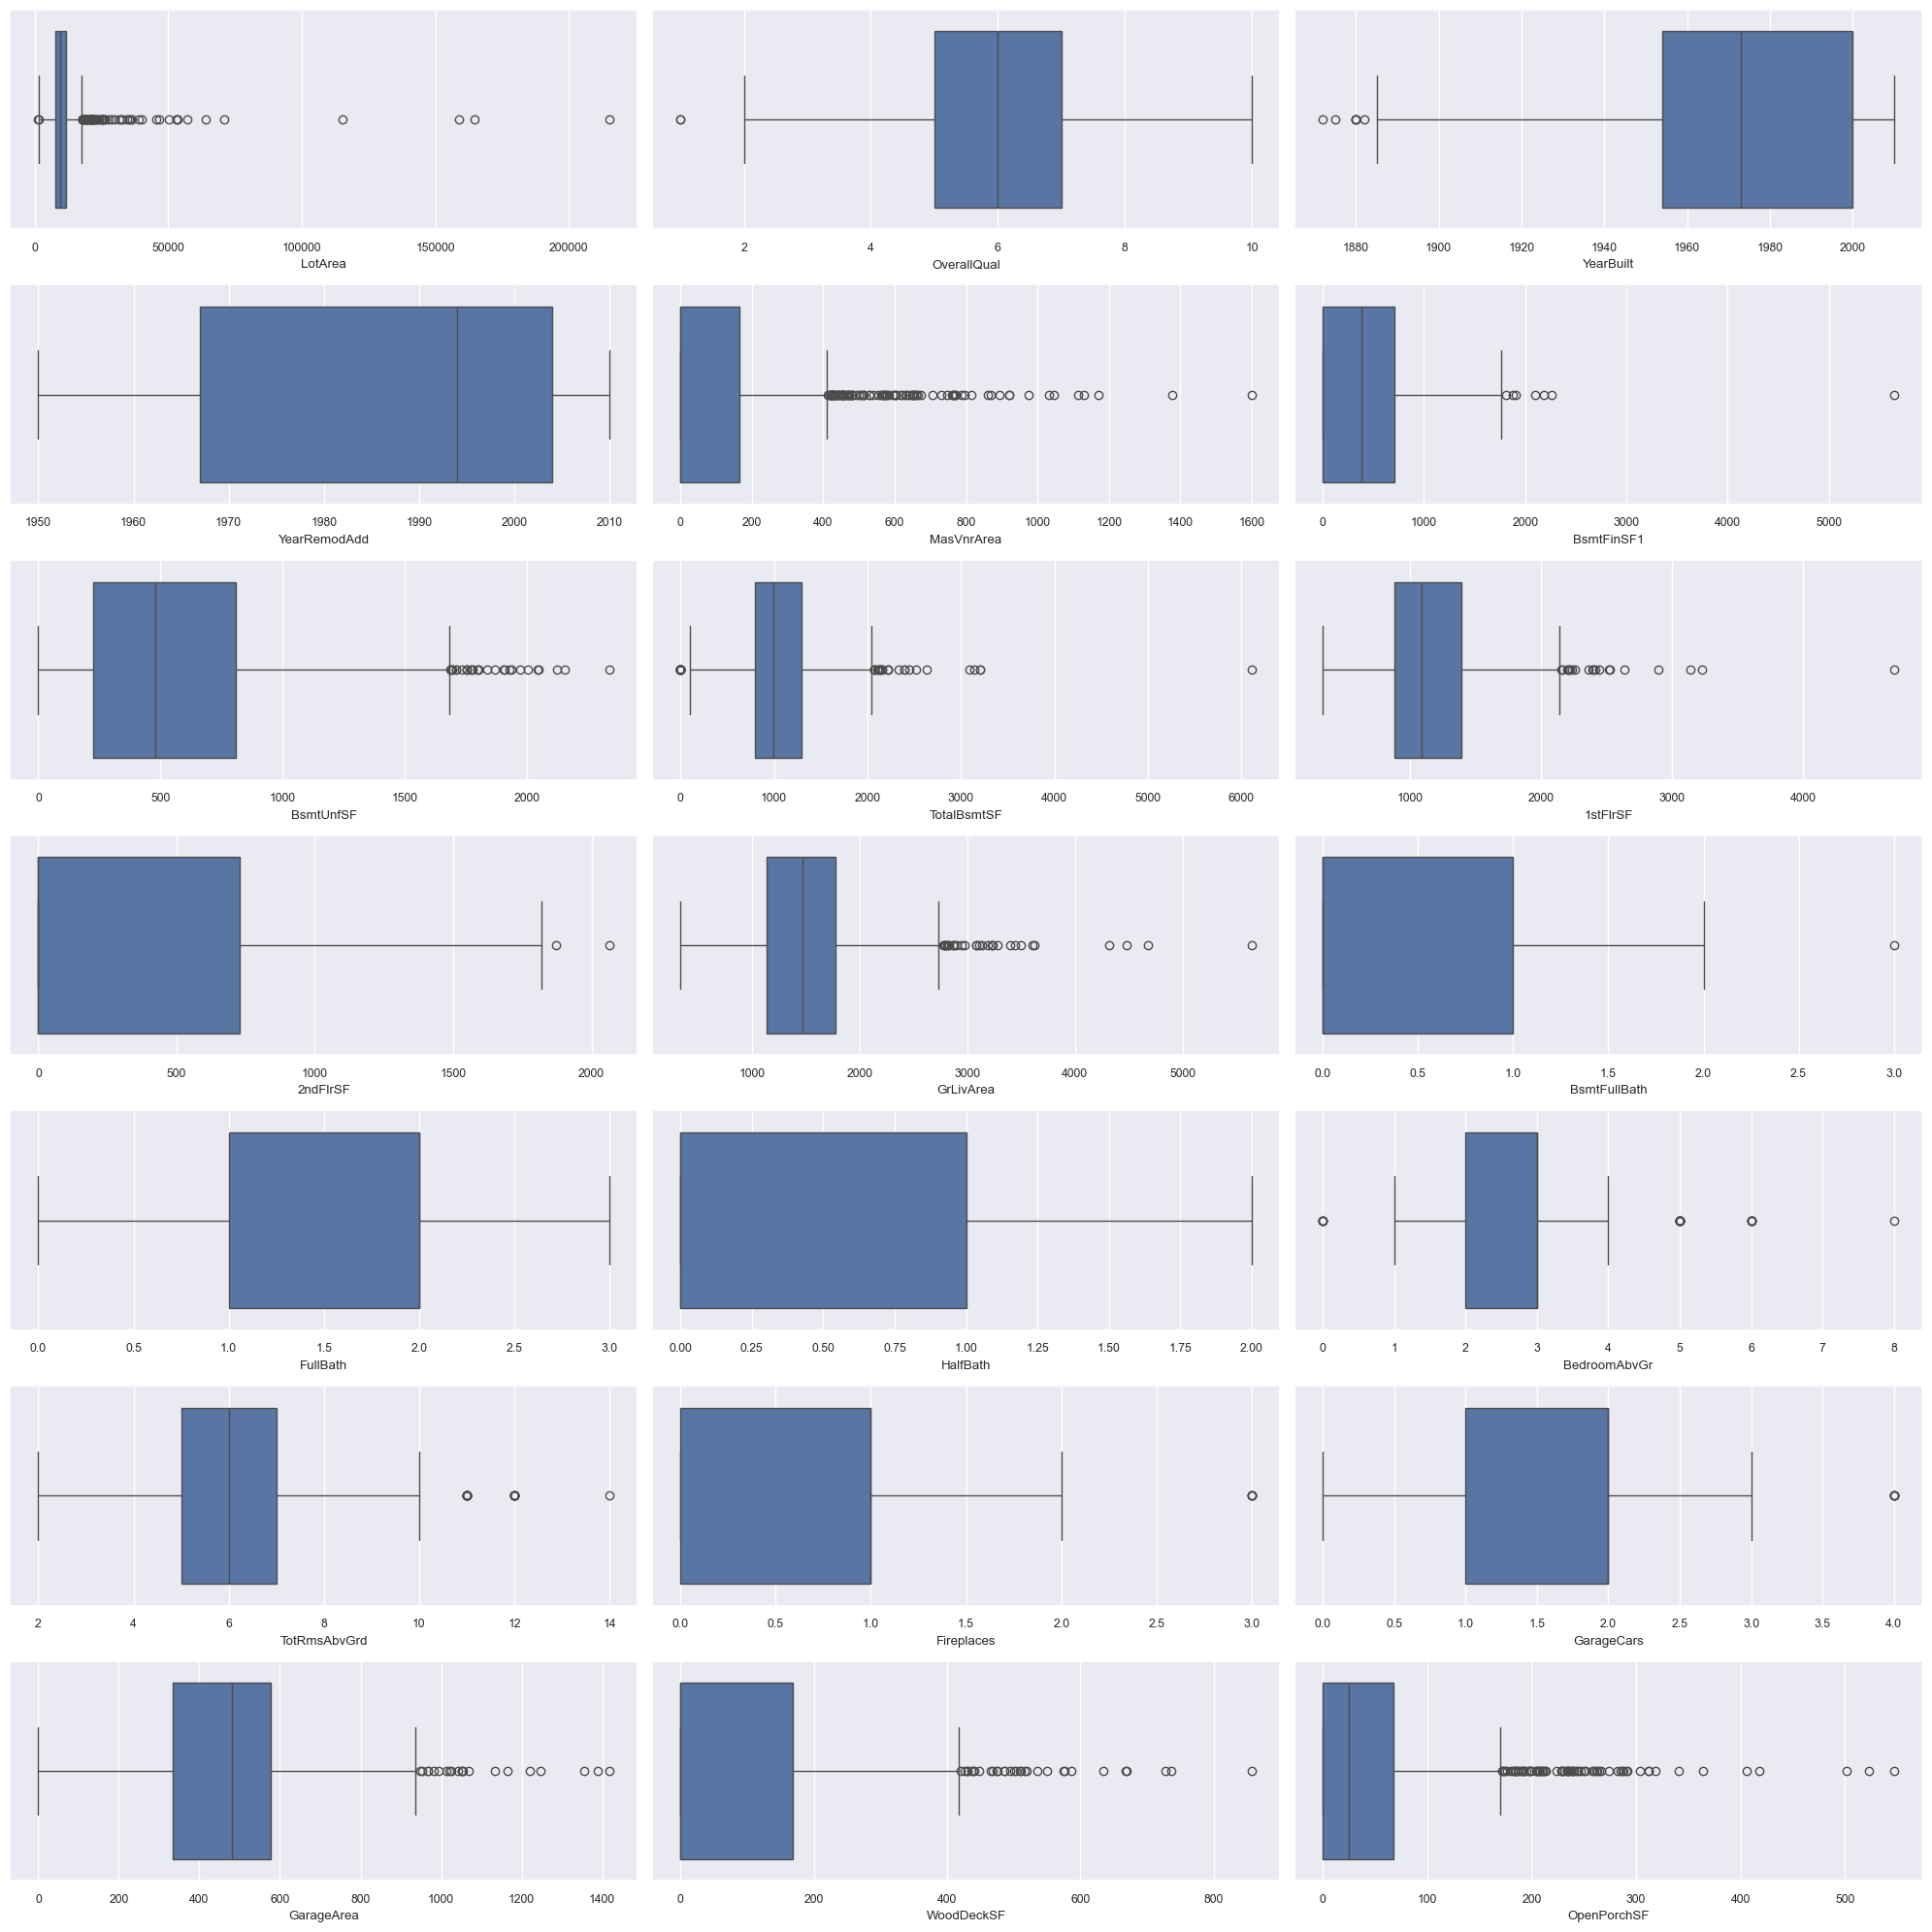

In [512]:
fig, axes = plt.subplots(7,3, figsize=(20,20))
for axx, col in zip(axes.flatten(), correlated_columns):
    sns.boxplot(df, x=col, ax=axx)

plt.tight_layout()